In [57]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("madfhantr.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])
df["Property_Area"]= le.fit_transform(df["Property_Area"])
df["Gender"] = le.fit_transform(df["Gender"])
df["Married"] = le.fit_transform(df["Married"])
df["Education"] = le.fit_transform(df["Education"])
df["Self_Employed"] = le.fit_transform(df["Self_Employed"])

In [60]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [61]:
df['Credit_History']=df['Credit_History'].fillna(0);
df.dropna(subset=["LoanAmount"])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3+,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [62]:
x=df.drop(labels=["Loan_ID","Dependents","Loan_Status"],axis=1)

y=df["Loan_Status"]
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,NaN,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2


In [63]:
model = DecisionTreeClassifier(random_state=0)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [64]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.42      0.41      0.41        44
           1       0.77      0.77      0.77       110

    accuracy                           0.67       154
   macro avg       0.59      0.59      0.59       154
weighted avg       0.67      0.67      0.67       154

0.6688311688311688


[Text(0.3620871113989637, 0.9722222222222222, 'Credit_History <= 0.5\ngini = 0.438\nsamples = 460\nvalue = [149, 311]'), Text(0.21502590673575128, 0.9166666666666666, 'LoanAmount <= 547.5\ngini = 0.429\nsamples = 106\nvalue = [73, 33]'), Text(0.2885565090673575, 0.9444444444444444, 'True  '), Text(0.20466321243523317, 0.8611111111111112, 'LoanAmount <= 186.5\ngini = 0.418\nsamples = 104\nvalue = [73, 31]'), Text(0.16839378238341968, 0.8055555555555556, 'LoanAmount <= 159.0\ngini = 0.452\nsamples = 81\nvalue = [53, 28]'), Text(0.14766839378238342, 0.75, 'Loan_Amount_Term <= 420.0\ngini = 0.412\nsamples = 69\nvalue = [49, 20]'), Text(0.13730569948186527, 0.6944444444444444, 'LoanAmount <= 145.0\ngini = 0.441\nsamples = 61\nvalue = [41, 20]'), Text(0.12694300518134716, 0.6388888888888888, 'CoapplicantIncome <= 1993.5\ngini = 0.466\nsamples = 54\nvalue = [34, 20]'), Text(0.09844559585492228, 0.5833333333333334, 'CoapplicantIncome <= 1478.0\ngini = 0.42\nsamples = 40\nvalue = [28, 12]'), Te

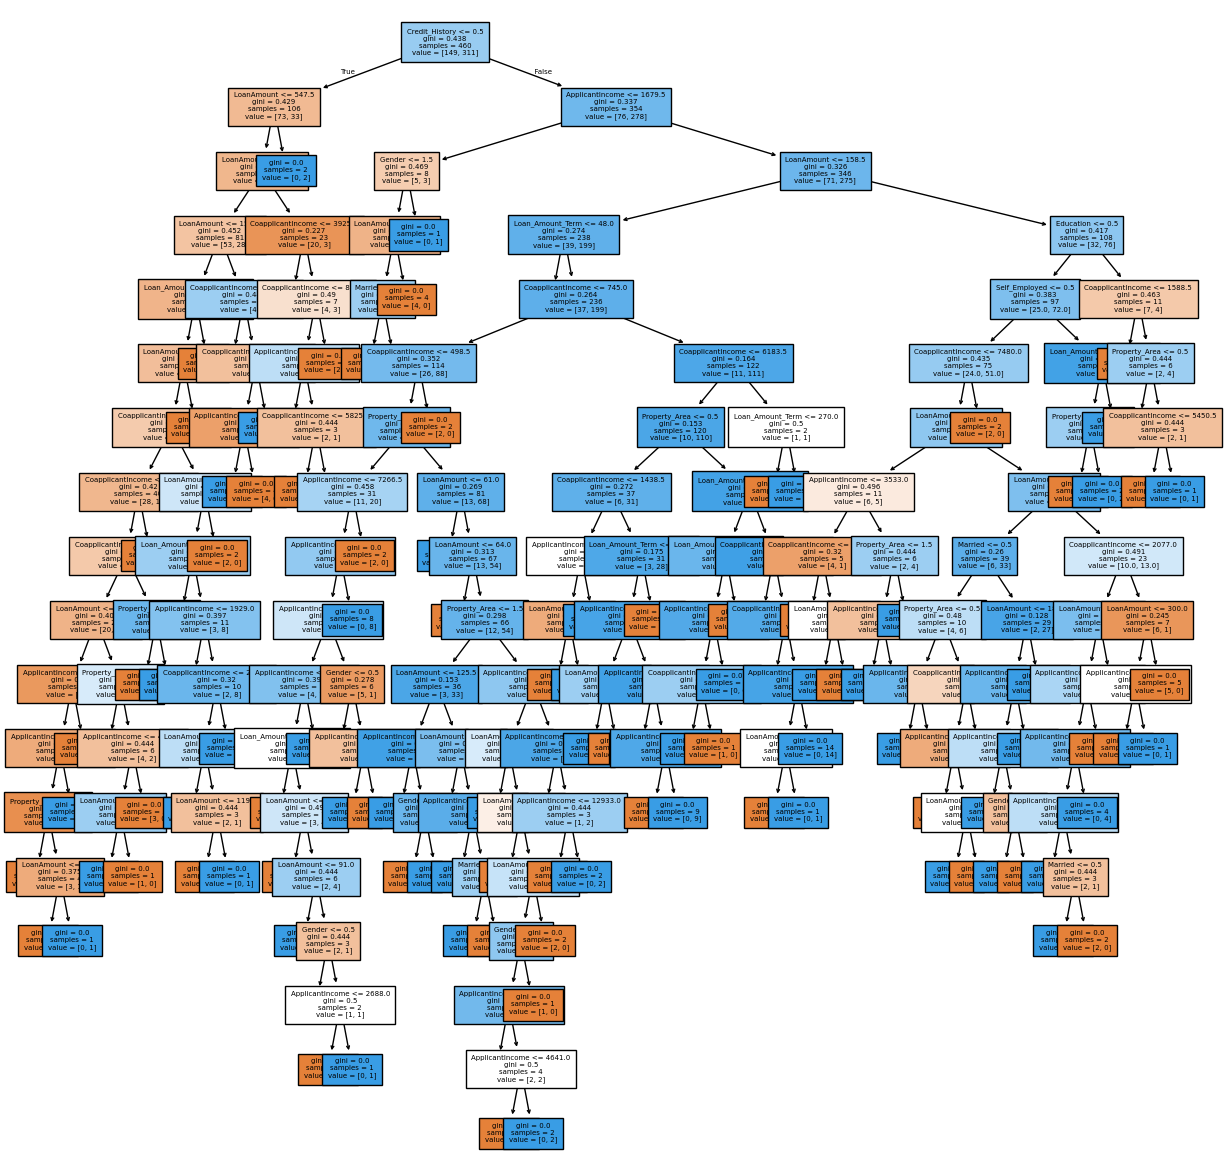

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
print(plot_tree(model,feature_names=x.columns,filled=True,fontsize=5))